In [2]:
import numpy as np
from pathlib import Path
import math

In [2]:
smear_fac = 0.011

In [3]:
run_path = "/afs/desy.de/user/a/axelheim/private/run_10.7_30.6_simpleDecayTree_separator/"
data_folder = 'SA_5k_5o7_4lvl_intermediates_1add' 

top_dir = Path(run_path)
dataset_dir = Path(run_path + 'data/' + data_folder)

In [8]:
leaves = np.load(dataset_dir / 'leaves.npy')



In [18]:
sample.shape

(5000, 13, 4)

In [19]:
def smear_momenta(data, smear_fac = 0.01):
    masses_squared = (data[:,:,3]**2 - (data[:,:,0:3]**2).sum(axis=2))  # m^2 = (E^2 - p^2)
    
    smeared = np.random.normal(loc=data, scale= abs(data * smear_fac), size=data.shape)
    smeared[:,:,3] = np.sqrt(masses_squared + (smeared[:,:,0:3]**2).sum(axis=2))
    
    
    return smeared

In [20]:
leaves[0,:3]

array([[ -7.01382952, -20.47774947, -20.72115122,  31.58952573],
       [-71.41962401, -68.8144023 ,  30.47826398, 103.99090938],
       [ -8.12482025,   4.91818088,   3.98145511,  11.44784661]])

In [21]:
smeared = smear_momenta(leaves)
smeared[0,:3]

array([[ -6.96410153, -20.6785547 , -20.34211618,  31.46272438],
       [-70.93924648, -68.32109025,  30.08904658, 103.2206316 ],
       [ -8.10485033,   4.87101087,   3.94281267,  11.40004901]])

In [22]:
def smear(data):
    sdata = np.empty(data.shape)

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            sdata[i, j, 0] = np.random.choice(
                np.random.normal(data[i, j, 0], abs(data[i, j, 0] * 0.011), 1000)
            )
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            sdata[i, j, 1] = np.random.choice(
                np.random.normal(data[i, j, 1], abs(data[i, j, 1] * 0.011), 1000)
            )
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            sdata[i, j, 2] = np.random.choice(
                np.random.normal(data[i, j, 2], abs(data[i, j, 2] * 0.011), 1000)
            )
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            sdata[i, j, 3] = math.sqrt(
                5 * 5
                + (
                    sdata[i, j, 0] * sdata[i, j, 0]
                    + sdata[i, j, 1] * sdata[i, j, 1]
                    + sdata[i, j, 2] * sdata[i, j, 2]
                )
            )
    return sdata

In [24]:
smeared2 = smear(leaves)

In [29]:
smeared1 = smear_momenta(leaves, 0.02)

In [30]:
print(leaves[0,0])
print(smeared1[0,0])
print(smeared2[0,0])

[ -7.01382952 -20.47774947 -20.72115122  31.58952573]
[ -7.06356421 -21.05342179 -20.89357943  32.08866108]
[ -6.99302777 -20.6062027  -20.45065986  30.27783869]


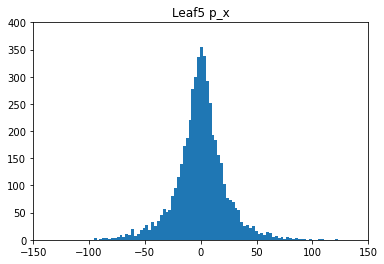

In [31]:
import matplotlib.pyplot as plt
_ = plt.hist(leaves[:,5,0], bins='auto')  # arguments are passed to np.histogram
plt.title("Leaf5 p_x")
plt.xlim([-150, 150])
plt.ylim([0, 400])

plt.show()

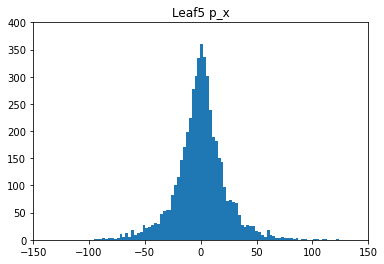

In [32]:
_ = plt.hist(smeared1[:,5,0], bins='auto')  # arguments are passed to np.histogram
plt.title("Leaf5 p_x")
plt.xlim([-150, 150])
plt.ylim([0, 400])

plt.show()

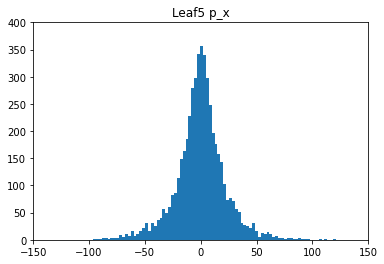

In [28]:
_ = plt.hist(smeared2[:,5,0], bins='auto')  # arguments are passed to np.histogram
plt.title("Leaf5 p_x")
plt.xlim([-150, 150])
plt.ylim([0, 400])

plt.show()

# Momentum dependent smearing

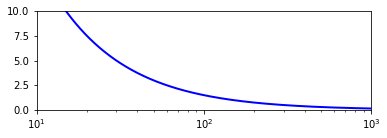

In [27]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

scale = 150

x = np.arange(0.01, 1000, 0.01)
y = [(1/i)*scale for i in x]
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(x, y, color='blue', lw=2)
plt.xlim([10, 1000])
plt.ylim([0, 10])
ax.set_xscale('log')

pylab.show()

(-89843.04707708489, -4064.6576474727954, -92.72596290593174, 1.3578255375491206)


/afs/desy.de/user/a/axelheim/miniconda3/envs/baum/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


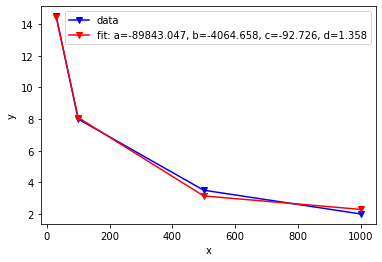

In [33]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


def func(x, a, b, c, d):

    return (a/(b+c*x) + d)


xdata = np.array([30,100,500,1000])
ydata = np.array([14.5,8,3.5,2])


plt.plot(xdata, ydata, 'b-', label='data',marker='v')

popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt), marker='v')

print(tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

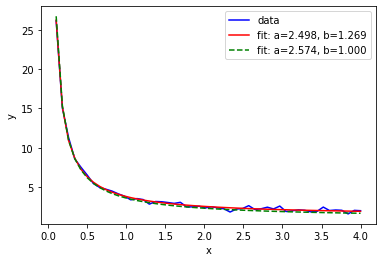

In [5]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


def func(x, a, b):

    return (a/x + b)


xdata = np.linspace(0.1, 4, 50)
y = func(xdata, 2.5, 1.3)

np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1.]))

plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

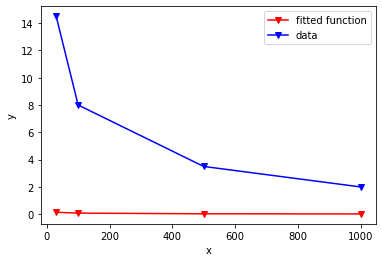

In [57]:
def mom_dependent_smearMagnitude(x):
    """returns ratio of std. deviation to energy of photons in percent
    x: photon energy in MeV
    fitted to data points from fig.16 "Belle2 physics book" top right plot, red line
    """
    a = -89843.04707708489
    b = -4064.6576474727954
    c = -92.72596290593174 
    d = 1.3578255375491206
    return (a/(b+c*x) + d)/100.0


xdata = np.array([30,100,500,1000])
ydata = np.array([14.5,8,3.5,2])

plt.plot(xdata, mom_dependent_smearMagnitude(xdata), 'r-',  marker='v', label='fitted function')
plt.plot(xdata, ydata, 'b-', label='data',marker='v')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [127]:
workdir = Path("/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/data/" + "test_onlyForDevWork_oneModeNoPadding")
workdir.mkdir(parents=True, exist_ok=True)
workdir

PosixPath('/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/data/test_onlyForDevWork_oneModeNoPadding')

In [128]:
leaves = np.load(workdir / 'leaves.npy')
SA = np.load(workdir / 'is_left_arr.npy')
global_tag = np.load(workdir / 'global_tag.npy')



In [129]:
type(global_tag[0,0])

numpy.bytes_

In [130]:
smear_factor = 0.02
smearFac_map = np.full(leaves.shape, smear_factor)

for i in range(len(leaves)):
    for j in range(len(leaves[1])):
        #print(str(tot_global_tag[i][j]))
        if str(global_tag[i][j]).find("gamma") != -1:
            smearFac_map[i,j] = mom_dependent_smearMagnitude(leaves[i,j,3])
            
smeared = smear_momenta(leaves,smearFac_map=smearFac_map)
            
            #print(global_tag[i][j])
            #pi_p.append(tot_leaves[i][j][3]) # this is the energy
            #pi_p.append(np.sqrt((tot_leaves[i][j][0:3]**2).sum(axis=0))) # this is the momentum

In [131]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


print(leaves[0],'\n')
print(global_tag[0],'\n')
print(smearFac_map[0])

[[ 415.2   108.07 -517.    671.83    0.  ]
 [ -15.51   12.23    7.89   21.27    0.  ]
 [-973.74   70.08 1381.05 1691.27    0.  ]
 [ 216.82 -137.73 -688.38  885.37    1.  ]
 [-165.86 -618.37 -729.44  980.6    -1.  ]
 [ 182.91  -30.5   -14.03  232.77   -1.  ]
 [ 125.25  374.62  429.41  600.02    1.  ]
 [ 175.79    5.18 -108.95  206.88    0.  ]] 

[b'gamma_3' b'gamma_2' b'gamma_1' b'K+_1' b'pi-_2' b'pi-_1' b'pi+_1'
 b'gamma_4' b'0'] 

[[0.03 0.03 0.03 0.03 0.03]
 [0.16 0.16 0.16 0.16 0.16]
 [0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02]
 [0.05 0.05 0.05 0.05 0.05]]


In [132]:
smearFac_map.shape

(10000, 8, 5)

In [135]:
def smear_momenta(data, smear_fac = 0.02, smearFac_map=None ):
    masses_squared = (data[:,:,3]**2 - (data[:,:,0:3]**2).sum(axis=2))  # m^2 = (E^2 - p^2)
    
    
    if not type(smearFac_map) == None:
        smeared = np.random.normal(loc=data[:,:,0:4], scale=abs(data[:,:,0:4] * smearFac_map[:,:,0:4]), size=data[:,:,0:4].shape)
    else:
        smeared = np.random.normal(loc=data[:,:,0:4], scale= abs(data[:,:,0:4] * smear_fac), size=data[:,:,0:4].shape)    
    
    smeared[:,:,3] = np.sqrt(masses_squared + (smeared[:,:,0:3]**2).sum(axis=2))    
    
    
    output = np.empty(data.shape)
    
    
    output[:,:,0:4] = smeared[:,:,0:4]
    if data.shape[2] > 4:    
        output[:,:,4:] = data[:,:,4:]
    
    
    return output

In [138]:
smeared = smear_momenta(leaves,smearFac_map=smearFac_map)

In [139]:
print(leaves[0],'\n')
print(smeared[0],'\n')

[[ 415.2   108.07 -517.    671.83    0.  ]
 [ -15.51   12.23    7.89   21.27    0.  ]
 [-973.74   70.08 1381.05 1691.27    0.  ]
 [ 216.82 -137.73 -688.38  885.37    1.  ]
 [-165.86 -618.37 -729.44  980.6    -1.  ]
 [ 182.91  -30.5   -14.03  232.77   -1.  ]
 [ 125.25  374.62  429.41  600.02    1.  ]
 [ 175.79    5.18 -108.95  206.88    0.  ]] 

[[ 410.15  108.38 -519.06  670.37    0.  ]
 [ -13.94   10.49    7.72   19.08    0.  ]
 [-986.85   71.59 1365.75 1686.5     0.  ]
 [ 214.26 -136.16 -685.47  882.24    1.  ]
 [-166.7  -614.34 -743.52  988.75   -1.  ]
 [ 183.57  -30.26  -13.86  233.25   -1.  ]
 [ 128.85  377.55  437.35  608.29    1.  ]
 [ 167.56    4.92 -106.3   198.49    0.  ]] 



# Deletion of FSPs

In [233]:
workdir = Path("/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/data/" + "test_onlyForDevWork_oneModeNoPadding")
workdir.mkdir(parents=True, exist_ok=True)
leaves = np.load(workdir / 'leaves.npy')
SA = np.load(workdir / 'is_left_arr.npy')
global_tag = np.load(workdir / 'global_tag.npy')

print(type(global_tag))

<class 'numpy.ndarray'>


In [234]:
def delete_specific_FSP_wCut(leaves, global_tag, deletion_particle, cut):
    """ deletes all FSPs which have momentum (MeV) below 'cut' and are of type 'deletion_particle'  """
    deletion_map = np.zeros(global_tag[:,:-1].shape)

    for i in range(len(leaves)):
        for j in range(len(leaves[1])):
            if str(global_tag[i][j]).find(deletion_particle) != -1:
                momentum = np.sqrt((leaves[i][j][0:3]**2).sum(axis=0))
                if momentum < cut:
                    deletion_map[i,j] = 1

    #deletion_map = deletion_map.astype(int)
    leaves[deletion_map == 1.0] = -1
    global_tag[:,:8][deletion_map == 1.0] = (((global_tag[:,:8][deletion_map == 1.0])[0]).astype(str)) + "_DELETED"
    return leaves, global_tag

In [235]:
global_tag.shape[1] - 1

8

In [236]:
deletion_particle = "gamma"
cut = 400

leaves, global_tag = delete_specific_FSP_wCut(leaves, global_tag, deletion_particle, cut)


In [264]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
print(leaves[2])
print(global_tag[2])

[[-118.05  -43.22   58.15  196.94   -1.  ]
 [-466.1  1031.91 -143.89 1149.95    1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [-381.83  318.48   26.08  497.9     0.  ]
 [-605.05  388.04  -97.67  725.39    0.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]]
[b'pi-_2' b'pi+_1' b'pi-_1_DELETED' b'gamma_1' b'gamma_2' b'K+_1_DELETED'
 b'gamma_2_DELETED' b'gamma_2_DELETED' b'0']


In [238]:
from random import choice




deletion_prob = 0.02
def delete_rand_FSPs(leaves, global_tag, deletion_prob=0.02): 
    padded_particle = np.full(leaves.shape[2], -1)

    for i in range(leaves.shape[0]):
        empty_entries = []
        for j in range(leaves.shape[1]):
            if (leaves[i,j] == padded_particle).all() == True:
                empty_entries.append((j))

        num_FSPs = leaves.shape[1] - len(empty_entries)
        num_delete = np.random.binomial(num_FSPs, deletion_prob)



        for l in range(num_delete):
            delete_idx = choice([i for i in range(leaves.shape[1]) if i not in empty_entries])
            empty_entries.append((delete_idx))
            leaves[i,delete_idx] = padded_particle
            global_tag[i,delete_idx] = (((global_tag[i,delete_idx])).astype(str)) + "_DELETED"
            
    return leaves, global_tag

In [239]:
leaves, global_tag = delete_rand_FSPs(leaves, global_tag, deletion_prob=0.2)

In [262]:
k=2
print(leaves[k])
print(global_tag[k])

[[-118.05  -43.22   58.15  196.94   -1.  ]
 [-466.1  1031.91 -143.89 1149.95    1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [-381.83  318.48   26.08  497.9     0.  ]
 [-605.05  388.04  -97.67  725.39    0.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]]
[b'pi-_2' b'pi+_1' b'pi-_1_DELETED' b'gamma_1' b'gamma_2' b'K+_1_DELETED'
 b'gamma_2_DELETED' b'gamma_2_DELETED' b'0']


In [263]:
print(leaves2[k])
print(global_tag2[k])

[[-118.05  -43.22   58.15  196.94   -1.  ]
 [-466.1  1031.91 -143.89 1149.95    1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [-381.83  318.48   26.08  497.9     0.  ]
 [-605.05  388.04  -97.67  725.39    0.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.  ]]
[b'pi-_2' b'pi+_1' b'pi-_1_DELETED' b'gamma_1' b'gamma_2' b'K+_1_DELETED'
 b'gamma_2_DELETED' b'gamma_2_DELETED' b'0']


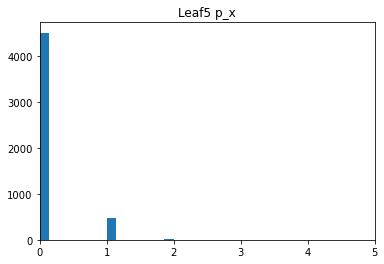

In [42]:
n=5
p=0.02

binomial = np.random.binomial(n, p, size=5000)

import matplotlib.pyplot as plt
_ = plt.hist(binomial, bins='auto')  # arguments are passed to np.histogram
plt.title("Leaf5 p_x")
plt.xlim([0, n])
#plt.ylim([0, 400])

plt.show()

# add background

In [85]:
import numpy as np
from phasespace import GenParticle
from random import choice

def give_bg(num_max_bg, prob, n_events):
    
    
    # create background tensors with -1s, as it is planned to randomize how many bg particles are used
    bg_leaves = np.full((n_events, num_max_bg, 4), -1.0)
    bg_SA = np.full((n_events, num_max_bg), -1)
    bg_global_tag = np.chararray((n_events, num_max_bg), itemsize=30)
    bg_global_tag[:,:] = "-1"
    
    print(bg_leaves.shape)
    print(bg_SA.shape)
    print(bg_global_tag.shape)
    
    
    # phase space part to create the bg particles
    bg_parti_names = ['BG_K','BG_pi','BG_gamma']
    pi_mass = 140
    K_mass = 494
    gamma_mass = 0
    K_1 = GenParticle(bg_parti_names[0], K_mass)
    pi_1 = GenParticle(bg_parti_names[1], pi_mass)
    gamma1 = GenParticle(bg_parti_names[2], gamma_mass)
    
    Y = GenParticle('Y', 1500).set_children(K_1, pi_1, gamma1)
    
    weights, particles = Y.generate(n_events=n_events)
    
    # read out the bg particle 4 momenta
    leaves_all = np.zeros((num_max_bg, n_events, 4))      
    for i in range(num_max_bg):
        leaves_all[i] = particles[bg_parti_names[i]]
    leaves_all = leaves_all.swapaxes(0, 1)
    
    print("leaves_all.shape:",leaves_all.shape)
    print("bg_parti_names:",bg_parti_names)
    charges = ["+","-"]
    # now transfer a random amount of bg particles to what will be sent back to data prod to be concatenated with the signal data
    for i in range(n_events):
        num_bg_particles = np.random.binomial(num_max_bg, prob)
        perms = np.random.permutation(num_max_bg)
        
        for j in range(num_bg_particles):
            rand_bg_part_idx = perms[j]
        
            bg_leaves[i,j] = leaves_all[i,rand_bg_part_idx]
            bg_SA[i,j] = 2
            
            part_name = bg_parti_names[rand_bg_part_idx]
            if part_name.find("gamma") == -1: # if not gamma, give the pion or kaon a random charge +/-
                part_name = part_name + choice(charges)
            
            bg_global_tag[i,j] = part_name
            
            
    return bg_leaves, bg_SA, bg_global_tag

In [86]:
bg_leaves, bg_SA, bg_global_tag = give_bg(3, 0.5, 1000)

(1000, 3, 4)
(1000, 3)
(1000, 3)
leaves_all.shape: (1000, 3, 4)
bg_parti_names: ['BG_K', 'BG_pi', 'BG_gamma']


In [87]:
bg_leaves

array([[[  -1.        ,   -1.        ,   -1.        ,   -1.        ],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ]],

       [[-201.95105927,   32.23617904,  -19.86608883,  248.63238539],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ]],

       [[ 500.80065506,  -53.78229875,  -30.50013514,  706.15868614],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ]],

       ...,

       [[-388.94045869, -244.98076981,  399.71869661,  625.0322347 ],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ],
        [  -1.        ,   -1.        ,   -1.        ,   -1.        ]],

       [[ 356.74523889, -155.18996701, -176.17379205,  449.43108074],
        [  18.98563079, -165.10566217, -197.77657224,  258.33293708],

In [88]:
for k in range(15):
    print("############")
    print(bg_leaves[k])
    print(bg_SA[k])
    print(bg_global_tag[k])

############
[[-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]
[-1 -1 -1]
[b'-1' b'-1' b'-1']
############
[[-201.95105927   32.23617904  -19.86608883  248.63238539]
 [  -1.           -1.           -1.           -1.        ]
 [  -1.           -1.           -1.           -1.        ]]
[ 2 -1 -1]
[b'BG_pi-' b'-1' b'-1']
############
[[500.80065506 -53.78229875 -30.50013514 706.15868614]
 [ -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.        ]]
[ 2 -1 -1]
[b'BG_K+' b'-1' b'-1']
############
[[ 202.46630797  416.48060419 -125.79768855  499.87374204]
 [ 100.73507362   97.80794144 -122.59382549  186.3952642 ]
 [  -1.           -1.           -1.           -1.        ]]
[ 2  2 -1]
[b'BG_pi+' b'BG_gamma' b'-1']
############
[[-68.02134888 231.06387166 484.48059407 732.6492085 ]
 [ -1.          -1.          -1.          -1.        ]
 [ -1.          -1.          -1.          -1.        ]]
[ 2 -1 -1]
[b'BG_K-' b'-1' b'-1']
############
[

In [47]:
type(bg_global_tag[0,0])

numpy.str_

In [27]:
print(bg_leaves.shape)
print(bg_SA.shape)
print(bg_global_tag.shape)

(1000, 3, 4)
(1000, 3)
(1000, 3)


In [9]:
print(type(bg_global_tag[0,0]))

<class 'numpy.str_'>


In [24]:
perms = np.random.permutation(3)
for i in perms:
    print(i)

2
1
0


In [101]:
bg_global_tag = np.chararray((100, 3), itemsize=30)
bg_global_tag[:,:] = "-1"
bg_global_tag[:,-1] = "last"

global_tag = np.chararray((100, 4), itemsize=30)
global_tag[:,:] = "-2"

# data inspection

In [1]:
from pathlib import Path
import numpy as np

workdir = Path("/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/data/test_10k_each_6trees_IDs_charge_wSmear")
workdir.mkdir(parents=True, exist_ok=True)
leaves = np.load(workdir / 'leaves.npy')
SA = np.load(workdir / 'is_left_arr.npy')
global_tag = np.load(workdir / 'global_tag.npy')

In [6]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

for i in range(30):
    print("mode",global_tag[i,-1])
    print(leaves[i])
    print(SA[i])
    print(global_tag[i,0:-1])
    print('\n \n')

mode b'4'
[[  -1.     -1.     -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.     -1.     -1.  ]
 [-625.55 1854.78  820.45 2127.03   -1.      0.95    0.03]
 [ 290.99 -719.79  -72.46  779.76    0.      0.04    0.02]
 [  -1.     -1.     -1.     -1.     -1.     -1.     -1.  ]
 [ 433.85 -849.74 -199.92  974.8     0.      0.1     0.02]
 [-727.25 -220.42 -511.74  926.79    1.      0.97    0.07]
 [ 398.47   71.36  113.74  443.18   -1.      0.93    0.14]
 [  -1.     -1.     -1.     -1.     -1.     -1.     -1.  ]
 [  -1.     -1.     -1.     -1.     -1.     -1.     -1.  ]]
[-1. -1. -1.  0.  1. -1.  1.  1.  0. -1. -1.]
[b'-1' b'-1' b'-1' b'pi-_2' b'gamma_2' b'-1' b'gamma_1' b'pi+_1' b'pi-_1'
 b'-1' b'-1']

 

mode b'0'
[[-240.66   74.95 -472.86  535.84    0.      0.01    0.03]
 [ 243.47   18.63  498.4   555.      0.      0.07    0.09]
 [  -1.     -1.     -1.     -1.     -1.     -1.     -1.  ]
 [-221.65  327.

In [8]:
i=25
print("mode",global_tag[i,-1])
print(leaves[i])
print(SA[i])
print(global_tag[i,0:-1])
print('\n \n')

mode b'4'
[[ -187.31    24.45   -46.38   194.51     0.       0.01     0.03]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [  209.47  -463.56   555.77   766.32    -1.       0.82     0.01]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [  402.4   -313.06   145.9    724.75    -1.       0.       0.87]
 [ -930.71    -0.09    48.39   931.97     0.       0.02     0.04]
 [ -150.09  -959.03 -1353.3   1671.32     1.       0.95     0.  ]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]]
[ 1. -1. -1. -1.  0. -1.  2.  1.  1. -1. -1.]
[b'gamma_1' b'-1' b'pi-_2_DELETED' b'-1' b'pi-_1' b'-1' b'BG_K-'
 b'gamma_2' b'pi+_1' b'-1' b'-1']

 



In [7]:
for i in range(global_tag.shape[0]):
    for j in range(global_tag.shape[1]):
        if str(global_tag[i,j]).find("DELETED") != -1:
            print("found:",global_tag[i,j],i,j)

found: b'pi-_2_DELETED' 25 2
found: b'BG_K+_DELETED' 26 0
found: b'pi+_1_DELETED' 29 7
found: b'pi-_1_DELETED' 38 2
found: b'pi+_1_DELETED' 44 5
found: b'-1_DELETED' 47 10
found: b'pi-_2_DELETED' 48 0
found: b'K+_1_DELETED' 48 3
found: b'pi-_1_DELETED' 49 10
found: b'-1_DELETED' 56 9
found: b'BG_K+_DELETED' 70 8
found: b'pi+_1_DELETED' 80 4
found: b'pi-_1_DELETED' 84 1
found: b'-1_DELETED' 85 5
found: b'K-_1_DELETED' 95 7
found: b'pi-_1_DELETED' 98 1
found: b'pi-_1_DELETED' 104 1
found: b'-1_DELETED' 117 4
found: b'BG_pi-_DELETED' 125 3
found: b'pi+_2_DELETED' 139 8
found: b'BG_K+_DELETED' 140 3
found: b'K-_1_DELETED' 148 4
found: b'gamma_1_DELETED' 157 1
found: b'BG_gamma_DELETED' 162 8
found: b'pi+_1_DELETED' 167 0
found: b'BG_gamma_DELETED' 167 9
found: b'-1_DELETED' 171 3
found: b'pi-_2_DELETED' 174 5
found: b'K-_2_DELETED' 177 9
found: b'pi+_1_DELETED' 185 8
found: b'pi-_2_DELETED' 195 3
found: b'pi-_2_DELETED' 200 0
found: b'-1_DELETED' 200 8
found: b'BG_gamma_DELETED' 207 6
foun

found: b'gamma_1_DELETED' 2525 3
found: b'pi-_1_DELETED' 2526 4
found: b'-1_DELETED' 2526 10
found: b'gamma_3_DELETED' 2527 7
found: b'pi+_1_DELETED' 2532 2
found: b'pi+_1_DELETED' 2534 0
found: b'pi-_2_DELETED' 2535 2
found: b'BG_K+_DELETED' 2538 6
found: b'pi+_1_DELETED' 2539 2
found: b'pi-_2_DELETED' 2539 4
found: b'-1_DELETED' 2544 0
found: b'pi+_1_DELETED' 2549 5
found: b'pi+_1_DELETED' 2550 4
found: b'pi+_2_DELETED' 2550 6
found: b'gamma_3_DELETED' 2553 6
found: b'BG_K+_DELETED' 2557 6
found: b'BG_gamma_DELETED' 2566 6
found: b'pi-_2_DELETED' 2576 2
found: b'K-_1_DELETED' 2582 6
found: b'pi+_1_DELETED' 2583 10
found: b'K+_1_DELETED' 2590 5
found: b'gamma_2_DELETED' 2593 8
found: b'BG_gamma_DELETED' 2594 2
found: b'pi-_1_DELETED' 2602 0
found: b'K+_1_DELETED' 2616 8
found: b'-1_DELETED' 2618 3
found: b'BG_gamma_DELETED' 2629 4
found: b'-1_DELETED' 2633 6
found: b'BG_K-_DELETED' 2635 5
found: b'gamma_3_DELETED' 2637 4
found: b'K-_2_DELETED' 2638 8
found: b'BG_pi-_DELETED' 2656 9
fo

found: b'-1_DELETED' 5278 3
found: b'-1_DELETED' 5284 2
found: b'K+_1_DELETED' 5296 0
found: b'BG_K+_DELETED' 5296 1
found: b'BG_K+_DELETED' 5320 6
found: b'pi-_2_DELETED' 5325 8
found: b'gamma_1_DELETED' 5327 2
found: b'pi-_2_DELETED' 5335 1
found: b'-1_DELETED' 5336 6
found: b'pi+_2_DELETED' 5345 8
found: b'-1_DELETED' 5345 9
found: b'-1_DELETED' 5370 7
found: b'-1_DELETED' 5389 7
found: b'gamma_4_DELETED' 5393 5
found: b'gamma_1_DELETED' 5406 0
found: b'-1_DELETED' 5406 7
found: b'gamma_2_DELETED' 5407 0
found: b'pi+_1_DELETED' 5419 1
found: b'K+_1_DELETED' 5422 5
found: b'BG_pi+_DELETED' 5431 10
found: b'pi+_1_DELETED' 5432 4
found: b'pi-_2_DELETED' 5434 0
found: b'pi-_2_DELETED' 5435 1
found: b'BG_pi-_DELETED' 5436 9
found: b'BG_gamma_DELETED' 5441 6
found: b'-1_DELETED' 5442 5
found: b'BG_gamma_DELETED' 5455 4
found: b'K+_1_DELETED' 5457 7
found: b'BG_gamma_DELETED' 5458 1
found: b'pi-_1_DELETED' 5458 4
found: b'pi+_2_DELETED' 5460 3
found: b'pi-_2_DELETED' 5475 9
found: b'gamma_

found: b'BG_gamma_DELETED' 8324 0
found: b'pi-_1_DELETED' 8324 1
found: b'K+_1_DELETED' 8325 3
found: b'pi-_2_DELETED' 8325 8
found: b'pi-_2_DELETED' 8330 6
found: b'-1_DELETED' 8334 4
found: b'pi-_1_DELETED' 8337 4
found: b'pi+_1_DELETED' 8337 6
found: b'pi+_1_DELETED' 8338 10
found: b'gamma_2_DELETED' 8342 4
found: b'pi-_2_DELETED' 8349 7
found: b'pi-_2_DELETED' 8356 2
found: b'pi+_1_DELETED' 8361 7
found: b'pi+_1_DELETED' 8367 8
found: b'pi-_2_DELETED' 8367 9
found: b'pi-_2_DELETED' 8368 8
found: b'BG_gamma_DELETED' 8372 1
found: b'pi-_1_DELETED' 8376 0
found: b'gamma_1_DELETED' 8380 3
found: b'gamma_1_DELETED' 8381 9
found: b'pi+_1_DELETED' 8382 6
found: b'-1_DELETED' 8384 6
found: b'K-_1_DELETED' 8391 8
found: b'BG_K-_DELETED' 8393 1
found: b'pi-_2_DELETED' 8393 3
found: b'pi-_2_DELETED' 8421 3
found: b'pi+_1_DELETED' 8433 2
found: b'pi-_2_DELETED' 8434 5
found: b'pi-_1_DELETED' 8435 4
found: b'pi-_2_DELETED' 8438 3
found: b'gamma_2_DELETED' 8441 10
found: b'-1_DELETED' 8446 7
fou

found: b'BG_gamma_DELETED' 11276 10
found: b'pi-_1_DELETED' 11283 1
found: b'BG_pi+_DELETED' 11286 4
found: b'pi-_2_DELETED' 11295 1
found: b'pi-_2_DELETED' 11308 5
found: b'BG_K-_DELETED' 11309 0
found: b'gamma_1_DELETED' 11309 6
found: b'-1_DELETED' 11316 7
found: b'K-_1_DELETED' 11328 3
found: b'gamma_2_DELETED' 11331 5
found: b'BG_K-_DELETED' 11332 5
found: b'BG_K-_DELETED' 11335 7
found: b'BG_pi+_DELETED' 11339 3
found: b'BG_gamma_DELETED' 11344 3
found: b'-1_DELETED' 11347 5
found: b'pi-_1_DELETED' 11348 0
found: b'K-_1_DELETED' 11352 6
found: b'gamma_4_DELETED' 11354 0
found: b'pi-_1_DELETED' 11362 10
found: b'K-_1_DELETED' 11364 4
found: b'BG_gamma_DELETED' 11365 6
found: b'gamma_3_DELETED' 11370 3
found: b'pi-_2_DELETED' 11372 2
found: b'BG_pi-_DELETED' 11375 3
found: b'-1_DELETED' 11377 3
found: b'pi-_2_DELETED' 11380 6
found: b'pi-_2_DELETED' 11387 2
found: b'-1_DELETED' 11391 0
found: b'gamma_1_DELETED' 11396 4
found: b'pi-_1_DELETED' 11398 8
found: b'pi+_1_DELETED' 11398 9

found: b'pi+_1_DELETED' 13989 1
found: b'K-_2_DELETED' 13992 5
found: b'pi-_2_DELETED' 13999 6
found: b'BG_K+_DELETED' 14011 3
found: b'BG_gamma_DELETED' 14019 10
found: b'pi-_2_DELETED' 14022 10
found: b'pi-_2_DELETED' 14025 5
found: b'gamma_1_DELETED' 14027 1
found: b'pi-_2_DELETED' 14027 5
found: b'gamma_1_DELETED' 14032 6
found: b'pi-_2_DELETED' 14035 8
found: b'-1_DELETED' 14037 0
found: b'-1_DELETED' 14046 6
found: b'pi-_2_DELETED' 14047 0
found: b'pi+_1_DELETED' 14052 0
found: b'BG_gamma_DELETED' 14053 6
found: b'gamma_1_DELETED' 14071 3
found: b'pi+_1_DELETED' 14074 5
found: b'pi+_2_DELETED' 14076 10
found: b'BG_pi+_DELETED' 14088 10
found: b'pi-_2_DELETED' 14099 6
found: b'BG_K-_DELETED' 14122 8
found: b'pi-_1_DELETED' 14123 3
found: b'gamma_2_DELETED' 14125 6
found: b'BG_K-_DELETED' 14134 1
found: b'BG_K+_DELETED' 14136 9
found: b'gamma_1_DELETED' 14149 7
found: b'gamma_1_DELETED' 14153 9
found: b'pi-_1_DELETED' 14157 2
found: b'-1_DELETED' 14164 4
found: b'pi+_1_DELETED' 141

found: b'-1_DELETED' 18119 2
found: b'gamma_2_DELETED' 18129 9
found: b'-1_DELETED' 18132 8
found: b'pi-_1_DELETED' 18136 9
found: b'-1_DELETED' 18140 5
found: b'pi+_2_DELETED' 18143 5
found: b'pi-_2_DELETED' 18145 6
found: b'pi-_1_DELETED' 18150 10
found: b'pi+_2_DELETED' 18152 5
found: b'-1_DELETED' 18158 6
found: b'K-_1_DELETED' 18160 0
found: b'pi-_2_DELETED' 18173 4
found: b'pi+_1_DELETED' 18173 8
found: b'pi-_2_DELETED' 18179 1
found: b'pi-_1_DELETED' 18185 3
found: b'-1_DELETED' 18190 6
found: b'pi-_2_DELETED' 18193 9
found: b'pi+_1_DELETED' 18204 6
found: b'pi-_1_DELETED' 18210 8
found: b'BG_pi+_DELETED' 18214 0
found: b'pi+_1_DELETED' 18217 0
found: b'BG_gamma_DELETED' 18224 10
found: b'gamma_1_DELETED' 18236 5
found: b'gamma_1_DELETED' 18242 7
found: b'BG_K+_DELETED' 18246 3
found: b'BG_K+_DELETED' 18249 10
found: b'gamma_1_DELETED' 18255 3
found: b'gamma_1_DELETED' 18266 3
found: b'pi+_1_DELETED' 18266 8
found: b'pi-_1_DELETED' 18272 6
found: b'pi+_1_DELETED' 18278 5
found: 

found: b'BG_K+_DELETED' 21938 4
found: b'pi-_2_DELETED' 21942 2
found: b'pi+_1_DELETED' 21945 1
found: b'gamma_2_DELETED' 21945 7
found: b'BG_K-_DELETED' 21956 1
found: b'BG_pi+_DELETED' 21960 2
found: b'-1_DELETED' 21962 2
found: b'pi-_2_DELETED' 21966 6
found: b'K+_1_DELETED' 21966 7
found: b'pi-_2_DELETED' 21969 1
found: b'K-_1_DELETED' 21974 5
found: b'pi+_1_DELETED' 21975 4
found: b'pi-_2_DELETED' 21986 0
found: b'pi-_2_DELETED' 21988 2
found: b'pi+_1_DELETED' 22004 10
found: b'BG_K-_DELETED' 22011 9
found: b'BG_K-_DELETED' 22014 6
found: b'pi-_1_DELETED' 22015 2
found: b'-1_DELETED' 22016 3
found: b'K-_1_DELETED' 22017 10
found: b'pi-_2_DELETED' 22018 5
found: b'pi+_1_DELETED' 22022 8
found: b'pi-_2_DELETED' 22024 10
found: b'-1_DELETED' 22038 2
found: b'pi-_1_DELETED' 22039 2
found: b'pi+_1_DELETED' 22042 3
found: b'pi+_2_DELETED' 22048 7
found: b'gamma_2_DELETED' 22052 8
found: b'gamma_2_DELETED' 22066 5
found: b'pi-_2_DELETED' 22067 1
found: b'pi+_2_DELETED' 22077 10
found: b'

found: b'pi-_2_DELETED' 26748 4
found: b'pi-_1_DELETED' 26748 6
found: b'pi-_2_DELETED' 26752 2
found: b'pi-_2_DELETED' 26753 6
found: b'pi+_1_DELETED' 26758 1
found: b'pi-_2_DELETED' 26759 4
found: b'BG_pi-_DELETED' 26761 8
found: b'pi-_2_DELETED' 26777 3
found: b'pi-_1_DELETED' 26780 0
found: b'pi-_1_DELETED' 26798 6
found: b'gamma_2_DELETED' 26800 3
found: b'K+_1_DELETED' 26806 8
found: b'pi+_1_DELETED' 26807 10
found: b'gamma_3_DELETED' 26810 5
found: b'-1_DELETED' 26813 6
found: b'pi-_2_DELETED' 26815 9
found: b'BG_pi-_DELETED' 26828 9
found: b'pi-_2_DELETED' 26843 9
found: b'pi-_2_DELETED' 26863 1
found: b'pi+_1_DELETED' 26867 4
found: b'pi+_2_DELETED' 26870 2
found: b'BG_pi-_DELETED' 26881 9
found: b'BG_pi-_DELETED' 26885 6
found: b'-1_DELETED' 26885 10
found: b'gamma_4_DELETED' 26902 2
found: b'pi-_2_DELETED' 26904 2
found: b'pi+_1_DELETED' 26908 2
found: b'K+_1_DELETED' 26933 10
found: b'BG_K-_DELETED' 26934 7
found: b'-1_DELETED' 26953 2
found: b'gamma_2_DELETED' 26954 0
foun

found: b'gamma_1_DELETED' 31260 1
found: b'BG_gamma_DELETED' 31265 4
found: b'pi-_1_DELETED' 31266 0
found: b'BG_gamma_DELETED' 31268 6
found: b'pi+_1_DELETED' 31269 7
found: b'K+_1_DELETED' 31277 8
found: b'BG_gamma_DELETED' 31279 9
found: b'gamma_2_DELETED' 31282 1
found: b'pi+_1_DELETED' 31298 2
found: b'BG_pi+_DELETED' 31303 0
found: b'pi-_2_DELETED' 31304 8
found: b'K+_1_DELETED' 31305 9
found: b'pi-_2_DELETED' 31307 5
found: b'pi+_1_DELETED' 31316 9
found: b'BG_gamma_DELETED' 31319 1
found: b'pi-_2_DELETED' 31328 6
found: b'pi-_1_DELETED' 31331 2
found: b'pi-_2_DELETED' 31334 1
found: b'pi-_2_DELETED' 31336 5
found: b'pi+_1_DELETED' 31339 6
found: b'gamma_2_DELETED' 31356 3
found: b'pi-_2_DELETED' 31360 5
found: b'K+_1_DELETED' 31363 6
found: b'pi+_1_DELETED' 31363 10
found: b'BG_pi-_DELETED' 31366 1
found: b'pi+_1_DELETED' 31371 4
found: b'pi-_1_DELETED' 31374 10
found: b'BG_K-_DELETED' 31384 4
found: b'K+_1_DELETED' 31387 1
found: b'pi-_1_DELETED' 31387 8
found: b'-1_DELETED' 3

found: b'gamma_2_DELETED' 35699 8
found: b'pi-_2_DELETED' 35706 4
found: b'pi-_1_DELETED' 35710 5
found: b'pi-_2_DELETED' 35712 0
found: b'-1_DELETED' 35712 1
found: b'pi-_2_DELETED' 35713 5
found: b'BG_gamma_DELETED' 35716 0
found: b'pi-_2_DELETED' 35721 4
found: b'pi-_2_DELETED' 35731 2
found: b'pi-_2_DELETED' 35731 9
found: b'-1_DELETED' 35736 2
found: b'pi-_2_DELETED' 35752 5
found: b'gamma_4_DELETED' 35753 10
found: b'BG_pi+_DELETED' 35759 2
found: b'pi-_1_DELETED' 35777 9
found: b'pi+_1_DELETED' 35780 2
found: b'gamma_3_DELETED' 35783 6
found: b'K-_1_DELETED' 35802 0
found: b'gamma_1_DELETED' 35805 4
found: b'BG_pi+_DELETED' 35807 7
found: b'BG_gamma_DELETED' 35814 8
found: b'-1_DELETED' 35817 7
found: b'pi-_2_DELETED' 35822 0
found: b'pi-_2_DELETED' 35832 7
found: b'gamma_4_DELETED' 35836 5
found: b'pi-_2_DELETED' 35837 9
found: b'BG_pi-_DELETED' 35844 6
found: b'gamma_1_DELETED' 35845 3
found: b'-1_DELETED' 35859 2
found: b'pi-_2_DELETED' 35865 10
found: b'-1_DELETED' 35868 6
f

found: b'pi-_2_DELETED' 39755 2
found: b'BG_K+_DELETED' 39757 6
found: b'pi-_2_DELETED' 39764 0
found: b'pi-_2_DELETED' 39765 4
found: b'-1_DELETED' 39766 4
found: b'BG_pi+_DELETED' 39768 3
found: b'pi+_1_DELETED' 39773 3
found: b'K+_1_DELETED' 39775 2
found: b'pi-_2_DELETED' 39776 2
found: b'pi-_2_DELETED' 39776 6
found: b'pi+_1_DELETED' 39778 2
found: b'pi-_2_DELETED' 39778 9
found: b'pi-_1_DELETED' 39779 5
found: b'pi-_2_DELETED' 39785 6
found: b'gamma_1_DELETED' 39792 6
found: b'pi-_2_DELETED' 39793 2
found: b'pi-_2_DELETED' 39794 5
found: b'pi-_2_DELETED' 39795 9
found: b'pi+_1_DELETED' 39803 9
found: b'K-_1_DELETED' 39810 9
found: b'-1_DELETED' 39811 5
found: b'gamma_2_DELETED' 39815 10
found: b'gamma_1_DELETED' 39818 3
found: b'gamma_2_DELETED' 39838 1
found: b'pi-_1_DELETED' 39842 9
found: b'BG_pi+_DELETED' 39848 2
found: b'pi+_1_DELETED' 39850 1
found: b'-1_DELETED' 39852 8
found: b'K+_1_DELETED' 39856 0
found: b'-1_DELETED' 39874 7
found: b'K-_1_DELETED' 39875 8
found: b'pi+_

found: b'pi-_2_DELETED' 41513 1
found: b'K+_1_DELETED' 41524 2
found: b'pi+_2_DELETED' 41525 5
found: b'pi-_1_DELETED' 41531 4
found: b'pi+_2_DELETED' 41533 10
found: b'pi-_1_DELETED' 41534 7
found: b'BG_K-_DELETED' 41550 3
found: b'K-_1_DELETED' 41554 6
found: b'pi-_2_DELETED' 41556 9
found: b'-1_DELETED' 41561 0
found: b'pi-_2_DELETED' 41564 8
found: b'pi-_2_DELETED' 41588 3
found: b'pi-_1_DELETED' 41591 8
found: b'gamma_2_DELETED' 41612 3
found: b'-1_DELETED' 41618 0
found: b'pi+_2_DELETED' 41620 6
found: b'pi-_2_DELETED' 41620 7
found: b'BG_K+_DELETED' 41621 2
found: b'pi-_1_DELETED' 41625 6
found: b'gamma_4_DELETED' 41635 7
found: b'-1_DELETED' 41639 3
found: b'BG_gamma_DELETED' 41644 1
found: b'pi-_2_DELETED' 41646 6
found: b'-1_DELETED' 41662 4
found: b'pi+_1_DELETED' 41664 9
found: b'gamma_3_DELETED' 41665 8
found: b'pi-_2_DELETED' 41670 0
found: b'gamma_2_DELETED' 41673 9
found: b'pi-_1_DELETED' 41692 7
found: b'-1_DELETED' 41703 8
found: b'-1_DELETED' 41705 6
found: b'BG_gamm

found: b'gamma_2_DELETED' 44352 5
found: b'pi-_2_DELETED' 44355 3
found: b'K+_1_DELETED' 44355 7
found: b'-1_DELETED' 44356 4
found: b'BG_gamma_DELETED' 44362 6
found: b'-1_DELETED' 44362 9
found: b'BG_gamma_DELETED' 44367 3
found: b'pi-_2_DELETED' 44370 8
found: b'K+_1_DELETED' 44383 8
found: b'gamma_2_DELETED' 44385 1
found: b'K+_1_DELETED' 44387 4
found: b'gamma_4_DELETED' 44389 1
found: b'pi-_2_DELETED' 44389 5
found: b'-1_DELETED' 44398 6
found: b'gamma_3_DELETED' 44400 9
found: b'-1_DELETED' 44403 7
found: b'gamma_1_DELETED' 44403 9
found: b'pi+_1_DELETED' 44410 9
found: b'K+_1_DELETED' 44418 5
found: b'pi-_2_DELETED' 44426 9
found: b'pi-_2_DELETED' 44438 1
found: b'pi-_2_DELETED' 44439 6
found: b'BG_pi-_DELETED' 44445 5
found: b'pi-_1_DELETED' 44454 6
found: b'BG_K-_DELETED' 44459 3
found: b'pi+_1_DELETED' 44463 2
found: b'gamma_2_DELETED' 44463 4
found: b'K-_1_DELETED' 44464 6
found: b'pi-_1_DELETED' 44467 1
found: b'pi+_1_DELETED' 44473 8
found: b'-1_DELETED' 44488 0
found: b'

found: b'BG_pi+_DELETED' 47522 3
found: b'pi+_2_DELETED' 47529 7
found: b'-1_DELETED' 47540 1
found: b'-1_DELETED' 47546 1
found: b'-1_DELETED' 47546 3
found: b'BG_K-_DELETED' 47549 2
found: b'pi+_1_DELETED' 47561 6
found: b'gamma_1_DELETED' 47562 5
found: b'pi+_1_DELETED' 47565 7
found: b'BG_K-_DELETED' 47566 1
found: b'pi-_1_DELETED' 47574 6
found: b'pi+_1_DELETED' 47575 6
found: b'pi+_1_DELETED' 47577 1
found: b'pi-_1_DELETED' 47582 6
found: b'pi-_2_DELETED' 47592 10
found: b'gamma_1_DELETED' 47607 2
found: b'K-_1_DELETED' 47609 5
found: b'BG_gamma_DELETED' 47610 8
found: b'pi-_2_DELETED' 47612 10
found: b'pi-_2_DELETED' 47617 8
found: b'BG_K-_DELETED' 47617 9
found: b'BG_gamma_DELETED' 47620 5
found: b'pi-_1_DELETED' 47628 1
found: b'pi-_2_DELETED' 47629 0
found: b'gamma_1_DELETED' 47641 3
found: b'gamma_2_DELETED' 47641 4
found: b'pi+_1_DELETED' 47643 0
found: b'gamma_4_DELETED' 47646 2
found: b'-1_DELETED' 47649 4
found: b'BG_pi-_DELETED' 47650 0
found: b'BG_pi+_DELETED' 47653 5


found: b'K-_2_DELETED' 50517 7
found: b'pi-_2_DELETED' 50522 1
found: b'K-_1_DELETED' 50527 0
found: b'pi+_1_DELETED' 50540 10
found: b'K+_1_DELETED' 50541 1
found: b'gamma_1_DELETED' 50551 9
found: b'-1_DELETED' 50555 5
found: b'pi-_2_DELETED' 50565 7
found: b'BG_K+_DELETED' 50565 10
found: b'BG_gamma_DELETED' 50572 0
found: b'BG_K+_DELETED' 50582 4
found: b'BG_pi-_DELETED' 50585 10
found: b'pi+_1_DELETED' 50610 2
found: b'pi-_2_DELETED' 50613 2
found: b'-1_DELETED' 50618 0
found: b'BG_gamma_DELETED' 50625 8
found: b'gamma_2_DELETED' 50635 10
found: b'BG_gamma_DELETED' 50643 2
found: b'pi-_2_DELETED' 50644 9
found: b'pi+_1_DELETED' 50654 10
found: b'pi+_1_DELETED' 50663 0
found: b'gamma_2_DELETED' 50676 3
found: b'-1_DELETED' 50680 7
found: b'BG_gamma_DELETED' 50680 8
found: b'pi-_1_DELETED' 50684 0
found: b'K+_1_DELETED' 50688 4
found: b'-1_DELETED' 50689 3
found: b'pi+_1_DELETED' 50695 2
found: b'gamma_2_DELETED' 50699 1
found: b'BG_K-_DELETED' 50701 2
found: b'pi-_2_DELETED' 50701 

found: b'pi-_2_DELETED' 53694 1
found: b'BG_K-_DELETED' 53702 4
found: b'pi-_2_DELETED' 53706 5
found: b'pi-_2_DELETED' 53712 8
found: b'gamma_4_DELETED' 53716 7
found: b'-1_DELETED' 53722 4
found: b'pi-_2_DELETED' 53732 6
found: b'pi-_2_DELETED' 53739 1
found: b'pi-_2_DELETED' 53743 7
found: b'gamma_2_DELETED' 53749 1
found: b'-1_DELETED' 53749 5
found: b'BG_pi-_DELETED' 53759 3
found: b'pi-_2_DELETED' 53764 8
found: b'pi+_2_DELETED' 53767 9
found: b'pi-_1_DELETED' 53768 1
found: b'pi+_1_DELETED' 53775 3
found: b'BG_gamma_DELETED' 53777 2
found: b'BG_pi-_DELETED' 53777 7
found: b'BG_K+_DELETED' 53781 2
found: b'pi-_2_DELETED' 53790 7
found: b'BG_K-_DELETED' 53793 5
found: b'K+_1_DELETED' 53794 8
found: b'pi+_2_DELETED' 53795 7
found: b'K-_1_DELETED' 53803 1
found: b'BG_K-_DELETED' 53803 5
found: b'pi-_2_DELETED' 53808 5
found: b'gamma_3_DELETED' 53809 8
found: b'BG_gamma_DELETED' 53812 3
found: b'pi+_1_DELETED' 53816 1
found: b'pi-_1_DELETED' 53819 7
found: b'pi-_2_DELETED' 53821 8
fo

found: b'gamma_2_DELETED' 57102 3
found: b'pi-_1_DELETED' 57103 8
found: b'pi+_1_DELETED' 57105 8
found: b'BG_pi-_DELETED' 57110 7
found: b'-1_DELETED' 57115 4
found: b'pi-_2_DELETED' 57119 4
found: b'K+_1_DELETED' 57133 6
found: b'pi-_2_DELETED' 57148 1
found: b'pi+_2_DELETED' 57153 10
found: b'BG_pi+_DELETED' 57160 10
found: b'pi+_2_DELETED' 57165 0
found: b'pi-_2_DELETED' 57176 4
found: b'pi+_2_DELETED' 57179 8
found: b'BG_K-_DELETED' 57183 4
found: b'-1_DELETED' 57185 1
found: b'pi-_2_DELETED' 57187 2
found: b'pi-_2_DELETED' 57187 3
found: b'-1_DELETED' 57197 4
found: b'pi-_1_DELETED' 57197 7
found: b'pi+_1_DELETED' 57198 7
found: b'BG_K+_DELETED' 57207 2
found: b'gamma_1_DELETED' 57213 5
found: b'K+_1_DELETED' 57219 7
found: b'K+_1_DELETED' 57220 9
found: b'-1_DELETED' 57223 5
found: b'K+_1_DELETED' 57248 1
found: b'BG_K+_DELETED' 57255 8
found: b'K-_1_DELETED' 57282 5
found: b'gamma_1_DELETED' 57284 6
found: b'gamma_2_DELETED' 57288 5
found: b'pi-_1_DELETED' 57288 7
found: b'pi-_

In [121]:
tot_leaves = leaves 
tot_global_tag = global_tag


print("ensure deleted/padded entries only contain -1")
padded_particle = np.full(tot_leaves.shape[2], -1)
deletion_map = np.zeros(tot_global_tag[:,:-1].shape)

for i in range(len(tot_leaves)):
    for j in range(len(tot_leaves[1])):
        if str(tot_global_tag[i][j]).find("-1") != -1:
            #print("tot_global_tag[i][j]:",tot_global_tag[i][j])
            deletion_map[i,j] = 1
        if str(tot_global_tag[i][j]).find("DELETED") != -1:
            deletion_map[i,j] = 1
            
print("deletion_map:",deletion_map)
print("padded_particle.shape:",padded_particle.shape)
print("deletion_map.shape:",deletion_map.shape)
tot_leaves[deletion_map == 1.0] = padded_particle

ensure deleted/padded entries only contain -1
deletion_map: [[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 1.]]
padded_particle.shape: (7,)
deletion_map.shape: (60000, 11)


In [123]:
leaves[0]

array([[  -43.59,   268.4 ,   562.31,   640.11,     1.  ,     1.  ,
            0.  ],
       [  191.85,   -70.74,   409.09,   478.29,    -1.  ,     0.99,
            0.01],
       [   -1.  ,    -1.  ,    -1.  ,    -1.  ,    -1.  ,    -1.  ,
           -1.  ],
       [  427.32,   495.91,    14.59,   669.59,    -1.  ,     1.  ,
            0.09],
       [ -252.25,   248.63,  -842.92,   924.97,    -1.  ,     0.98,
            0.05],
       [ -283.32,   187.32,    35.5 ,   341.49,     0.  ,     0.  ,
            0.02],
       [   -1.  ,    -1.  ,    -1.  ,    -1.  ,    -1.  ,    -1.  ,
           -1.  ],
       [  383.8 , -1627.88,   763.86,  1844.01,     1.  ,     0.99,
            0.03],
       [   -1.  ,    -1.  ,    -1.  ,    -1.  ,    -1.  ,    -1.  ,
           -1.  ],
       [ -426.16,   921.29,  -391.35,  1194.81,     1.  ,     0.04,
            1.  ],
       [  101.15,  -113.26,  -446.78,   683.16,     1.  ,     0.  ,
            0.95]])